# 資料匯入

In [20]:
import pandas as pd
df = pd.read_csv("iris.csv",encoding = "big5") #也可load sklearn內建iris datasets
df.head()

,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 切分資料 (為作圖方便，先只選取兩個features)

In [21]:
from sklearn.model_selection import train_test_split

X = df[['花萼長度','花萼寬度']]
y = df['屬種']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)
X_train.head()

,花萼長度,花萼寬度
21,5.1,3.7
56,6.3,3.3
149,5.9,3.0
10,5.4,3.7
145,6.7,3.0


# 決策分類樹
可調整Gini或Entropy，決策樹可不用做資料標準化

In [22]:
print(X_train[:5])
print(y_train[:5])

     花萼長度  花萼寬度
21    5.1   3.7
56    6.3   3.3
149   5.9   3.0
10    5.4   3.7
145   6.7   3.0
21         Iris-setosa
56     Iris-versicolor
149     Iris-virginica
10         Iris-setosa
145     Iris-virginica
Name: 屬種, dtype: object


In [23]:
from sklearn.tree import DecisionTreeClassifier

# 可直接導入dataframe，不須標準化
tree = DecisionTreeClassifier(criterion='gini',max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [24]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", feature_names=['花萼長度','花萼寬度'],
                class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'],)

### 執行dot前須先安裝graphviz
在Anaconda中安裝graphviz，或是到官網下載：http://www.graphviz.org/Download..php

In [25]:
!dot -Tpng tree.dot -o tree.png

In [26]:
# 若無法正常顯示中文，可利用以下函式修改.dot裡的字體設定
def tree_set_font(filename, fontname):
    with open("tree.dot", encoding='utf-8') as fin, open('tree2.dot','w', encoding='utf-8') as fout:
        for line in fin:
            if 'node [shape=box]' in line:
                fout.write('node [shape=box,fontname="'+fontname+'"];\n')
            else:
                fout.write(line)

# 修改字體為 DFKai-SB
tree_set_font('tree.dot','DFKai-SB')
# 輸出為 .png
!dot -Tpng tree2.dot -o tree2.png

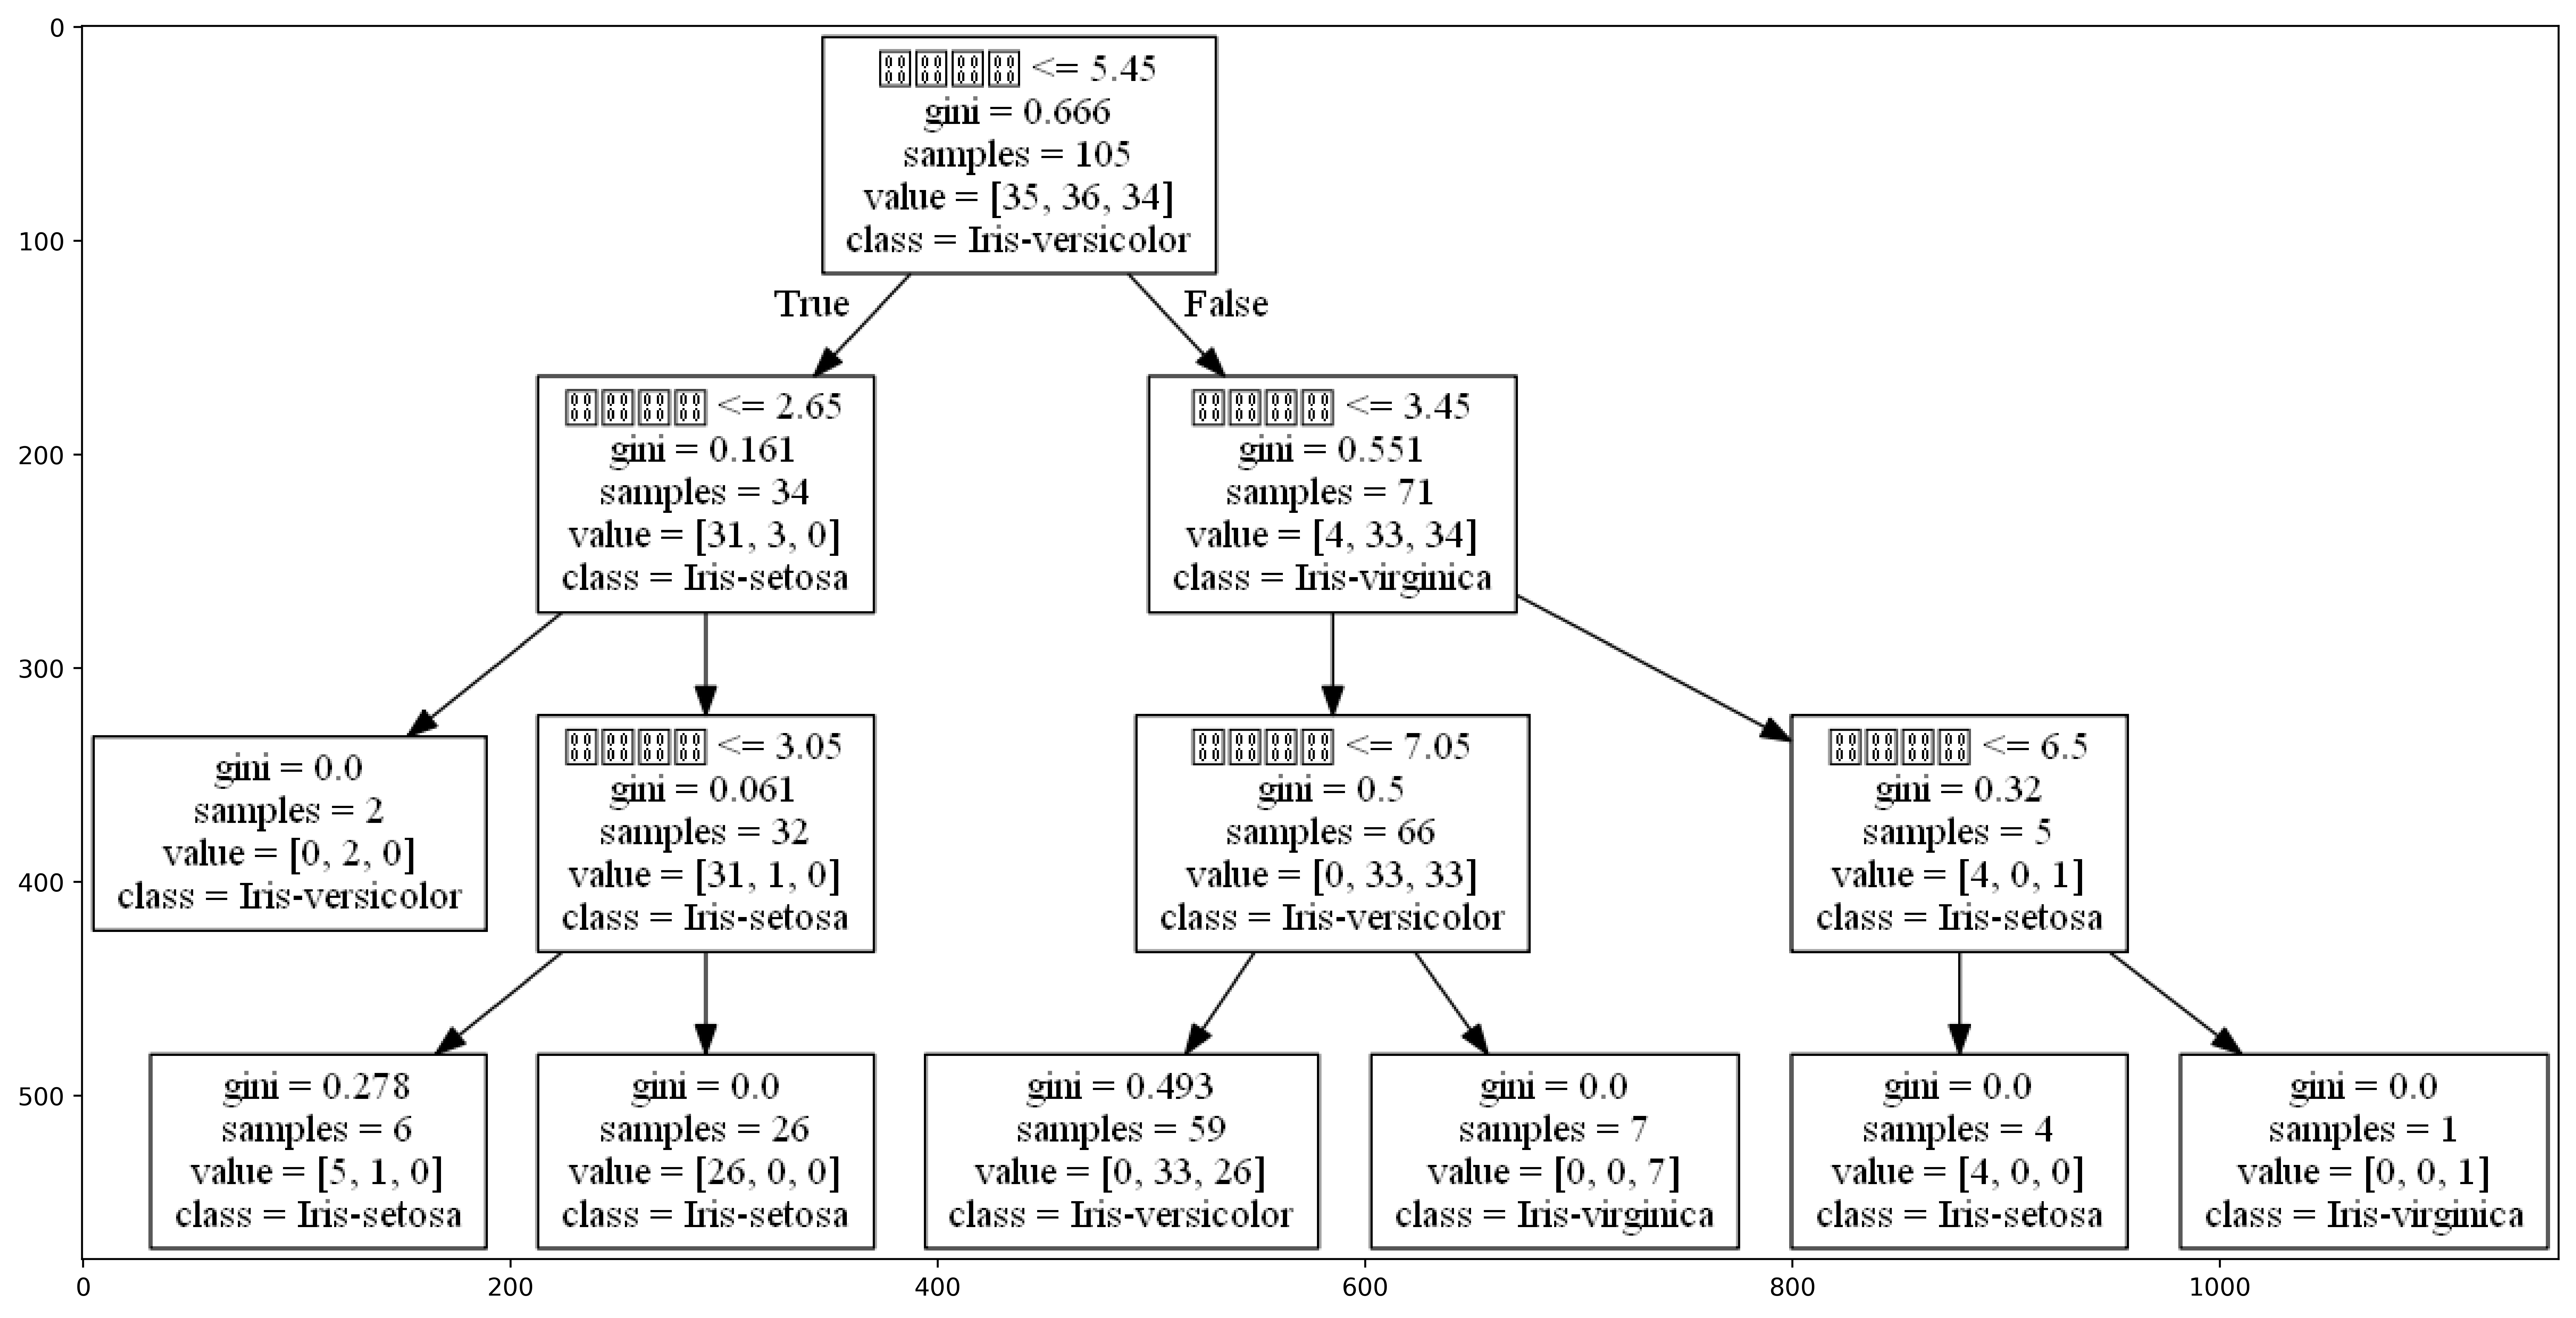

In [27]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline
img = mpimg.imread('tree.png')
fig = plt.figure(figsize=(18,20), dpi=500) #dpi:調整解析度
plt.imshow(img)

In [28]:
from sklearn import metrics
print(metrics.classification_report(y_test, tree.predict(X_test)))
print(metrics.confusion_matrix(y_test, tree.predict(X_test),labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

                 precision    recall  f1-score   support

    Iris-setosa       0.93      0.93      0.93        15
Iris-versicolor       0.50      0.93      0.65        14
 Iris-virginica       1.00      0.25      0.40        16

       accuracy                           0.69        45
      macro avg       0.81      0.70      0.66        45
   weighted avg       0.82      0.69      0.66        45

[[14  1  0]
 [ 1 13  0]
 [ 0 12  4]]


## 特徵重要性

In [29]:
tree.feature_importances_.tolist()
df = pd.DataFrame({'feature':['花萼長度','花萼寬度'],'feature_importance':tree.feature_importances_.tolist()})
df = df.sort_values(by=['feature_importance'],ascending=False).reset_index(drop=True)
df

,feature,feature_importance
0,花萼長度,0.786925
1,花萼寬度,0.213075


In [30]:
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.02*height, '%f'%float(height),
                ha='center', va='bottom')

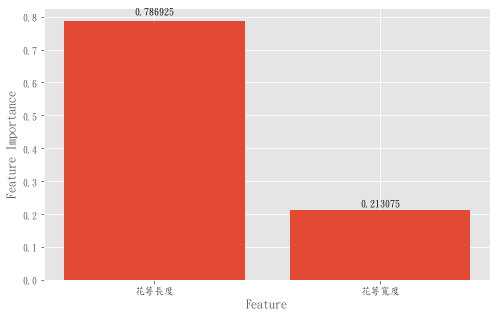

In [31]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig = plt.figure(figsize=(8,5))
plt.rcParams['font.family']='DFKai-SB' #顯示中文

gini = plt.bar(df.index,df['feature_importance'],align='center')
plt.xlabel('Feature') #X軸名稱
plt.ylabel('Feature Importance') #Y軸名稱
plt.xticks(df.index, df['feature']) #X軸項目名稱

autolabel(gini)

plt.show()